XGBoost - Average Accuracy: 0.5620, Average F1 Score: 0.5607
Gradient Boosting - Average Accuracy: 0.5617, Average F1 Score: 0.5617


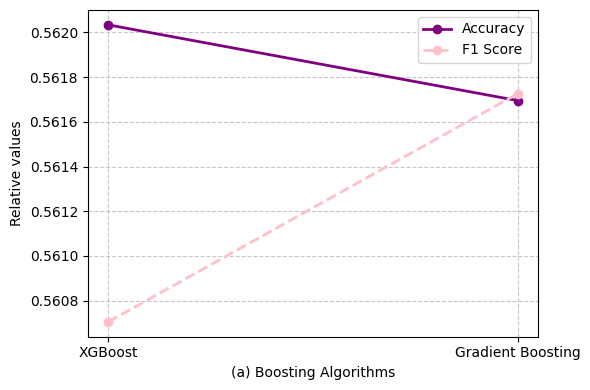

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Contraceptive_method'])  
    y = data['Contraceptive_method']
    return X, y

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a model, returning accuracy and F1 score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

def boosting_experiment(X, y, n_experiments=10):
    """
    Run multiple experiments to compare accuracy of XGBoost and Gradient Boosting,
    and calculate the average accuracy and F1 score.
    """
    xgb_accuracies, xgb_f1_scores = [], []
    gb_accuracies, gb_f1_scores = [], []

    # Run multiple experiments
    for i in range(n_experiments):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Initialize models
        xgb_model = XGBClassifier(
    max_depth=3, 
    gamma=0,
    learning_rate=0.1,            # Lower learning rate for more gradual learning
    n_estimators=100,             # Increase estimators as learning rate decreases
    subsample=0.8,                # Use 80% of data to reduce overfitting
    colsample_bytree=0.6,         # Use 80% of features for each tree
    min_child_weight=1,           # Adjust to control tree size
    eval_metric='mlogloss'        # Metric for evaluation
)
        gb_model = GradientBoostingClassifier( max_depth=3,    learning_rate=0.1,n_estimators=100,random_state=1)

        # Evaluate XGBoost
        xgb_accuracy, xgb_f1 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
        xgb_accuracies.append(xgb_accuracy)
        xgb_f1_scores.append(xgb_f1)

        # Evaluate Gradient Boosting
        gb_accuracy, gb_f1 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
        gb_accuracies.append(gb_accuracy)
        gb_f1_scores.append(gb_f1)

    # Calculate average scores
    avg_xgb_accuracy = np.mean(xgb_accuracies)
    avg_xgb_f1 = np.mean(xgb_f1_scores)
    avg_gb_accuracy = np.mean(gb_accuracies)
    avg_gb_f1 = np.mean(gb_f1_scores)

    print(f"XGBoost - Average Accuracy: {avg_xgb_accuracy:.4f}, Average F1 Score: {avg_xgb_f1:.4f}")
    print(f"Gradient Boosting - Average Accuracy: {avg_gb_accuracy:.4f}, Average F1 Score: {avg_gb_f1:.4f}")

    # Plot results
    labels = ['XGBoost', 'Gradient Boosting']
    accuracies = [avg_xgb_accuracy, avg_gb_accuracy]
    f1_scores = [avg_xgb_f1, avg_gb_f1]

    plt.figure(figsize=(6, 4))
    plt.plot(labels, accuracies, marker='o', color='purple', label='Accuracy', linewidth=2)
    plt.plot(labels, f1_scores, marker='o', linestyle='--', color='pink', label='F1 Score', linewidth=2)
    plt.xlabel('(a) Boosting Algorithms')
    plt.ylabel('Relative values')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig("boosting_comparison.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/contraceptive_method_choice.csv')
    boosting_experiment(X, y, n_experiments=10)


XGBoost - Average Accuracy: 0.6158, Average F1 Score: 0.6097
Gradient Boosting - Average Accuracy: 0.6264, Average F1 Score: 0.6152


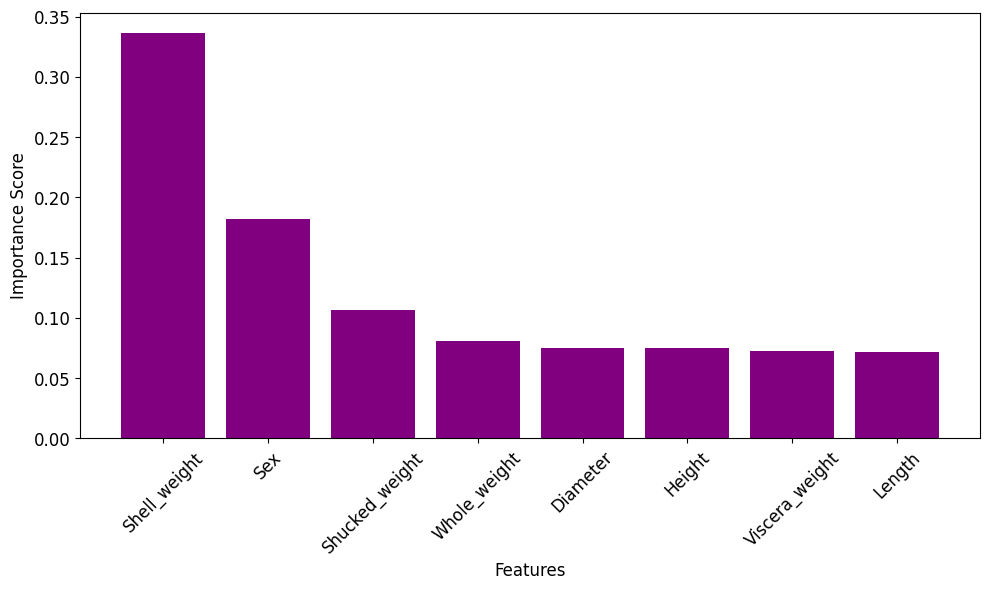

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings'] - 1  # Adjust target labels to start from 0
    return X, y

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a model, returning accuracy and F1 score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

def plot_feature_importance(model, feature_names):
    """
    Plot the feature importance for a trained XGBoost model.
    """
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]  # Sort features by importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[indices], align="center",color='purple')
    plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=45,fontsize=12)
    plt.xlabel("Features",fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("Importance Score",fontsize=12)
    plt.tight_layout()
    plt.show()

def boosting_experiment(X, y, n_experiments=10):
    """
    Run multiple experiments to compare accuracy of XGBoost and Gradient Boosting,
    and calculate the average accuracy and F1 score.
    """
    xgb_accuracies, xgb_f1_scores = [], []
    gb_accuracies, gb_f1_scores = [], []

    # Run multiple experiments
    for i in range(n_experiments):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Initialize models
        xgb_model = XGBClassifier(max_depth=5, subsample=0.9, random_state=1, eval_metric='mlogloss')
        gb_model = GradientBoostingClassifier(random_state=1)

        # Evaluate XGBoost
        xgb_accuracy, xgb_f1 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
        xgb_accuracies.append(xgb_accuracy)
        xgb_f1_scores.append(xgb_f1)

        # Evaluate Gradient Boosting
        gb_accuracy, gb_f1 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
        gb_accuracies.append(gb_accuracy)
        gb_f1_scores.append(gb_f1)

    # Calculate average scores
    avg_xgb_accuracy = np.mean(xgb_accuracies)
    avg_xgb_f1 = np.mean(xgb_f1_scores)
    avg_gb_accuracy = np.mean(gb_accuracies)
    avg_gb_f1 = np.mean(gb_f1_scores)

    print(f"XGBoost - Average Accuracy: {avg_xgb_accuracy:.4f}, Average F1 Score: {avg_xgb_f1:.4f}")
    print(f"Gradient Boosting - Average Accuracy: {avg_gb_accuracy:.4f}, Average F1 Score: {avg_gb_f1:.4f}")

    # Plot feature importance for XGBoost
    plot_feature_importance(xgb_model, X.columns)

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    boosting_experiment(X, y, n_experiments=10)


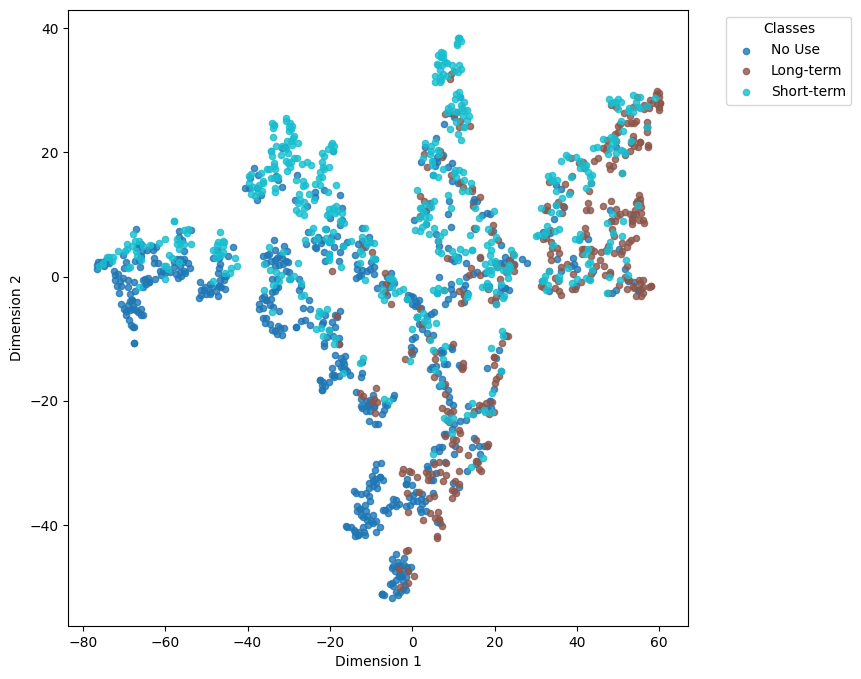

In [54]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,global_max_pool
from torch.optim import Adam
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from torch_geometric.data import Data
import numpy as np

def load_data(filepath):
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Contraceptive_method'])  
    y = data['Contraceptive_method']
    return X, y

def create_graph_data(X, y, K=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Adjust labels to start from 0
    y_adjusted = y - y.min()
    y_tensor = torch.tensor(y_adjusted.values, dtype=torch.long)

    adjacency_matrix = kneighbors_graph(X_scaled, K, mode='connectivity', include_self=False).toarray()
    edge_index = []
    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            if adjacency_matrix[i, j] == 1:
                edge_index.append([i, j])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    x_tensor = torch.tensor(X_scaled, dtype=torch.float)
    graph_data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor)
    
    return graph_data, X_scaled.shape[1]

def gcn_experiment_with_visualization(graph_data, input_features, num_classes=3, epochs=1000, lr=0.01, weight_decay=1e-5, hidden_dim=128):
    class GCN(torch.nn.Module):
        def __init__(self, input_features, hidden_dim=128, num_classes=3):
            super(GCN, self).__init__()
            self.conv1 = GCNConv(input_features, hidden_dim)
            self.conv2 = GCNConv(hidden_dim, hidden_dim)
            self.conv3 = GCNConv(hidden_dim, num_classes)

        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=0.5, training=self.training)
            x = self.conv2(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=0.5, training=self.training)
            x = self.conv3(x, edge_index)
            return x, x  # Return final output and last hidden layer for embeddings

    model = GCN(input_features, hidden_dim=64, num_classes=num_classes)
    optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out, embeddings = model(graph_data)  # Get embeddings from last hidden layer
        loss = criterion(out, graph_data.y)
        loss.backward()
        optimizer.step()

    # Get embeddings in evaluation mode
    model.eval()
    with torch.no_grad():
        _, embeddings = model(graph_data)  # Use embeddings from last hidden layer

    embeddings = embeddings.cpu().numpy()
    labels = graph_data.y.cpu().numpy()

    # t-SNE for dimensionality reduction to 2D
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=43)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Define the class labels
    class_labels = {0: "No Use", 1: "Long-term", 2: "Short-term"}

    # Plot 2D embeddings with legend
    plt.figure(figsize=(8, 8))
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for i, label in enumerate(unique_labels):
        plt.scatter(embeddings_2d[labels == label, 0], embeddings_2d[labels == label, 1], 
                    color=colors[i], label=class_labels[label], alpha=0.8, s=20)

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Load data and create graph
X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/contraceptive_method_choice.csv')
graph_data, input_features = create_graph_data(X, y)

# Run experiment with visualization
gcn_experiment_with_visualization(graph_data, input_features)


Running Decision Tree Experiments
Experiment 1 - Accuracy: 0.5322, F1: 0.5362, ROC AUC: 0.6455
Experiment 2 - Accuracy: 0.5593, F1: 0.5580, ROC AUC: 0.6549
Experiment 3 - Accuracy: 0.5288, F1: 0.5215, ROC AUC: 0.6282
Experiment 4 - Accuracy: 0.5475, F1: 0.5544, ROC AUC: 0.6599
Experiment 5 - Accuracy: 0.5831, F1: 0.5823, ROC AUC: 0.6698
Experiment 6 - Accuracy: 0.5458, F1: 0.5406, ROC AUC: 0.6436
Experiment 7 - Accuracy: 0.5627, F1: 0.5590, ROC AUC: 0.6551
Experiment 8 - Accuracy: 0.5593, F1: 0.5574, ROC AUC: 0.6512
Experiment 9 - Accuracy: 0.5746, F1: 0.5724, ROC AUC: 0.6611
Experiment 10 - Accuracy: 0.5305, F1: 0.5152, ROC AUC: 0.6362

Final Results after multiple experiments:
Average Accuracy: 0.5524, Std Dev: 0.0177
Average F1 Score: 0.5497, Std Dev: 0.0202
Average ROC AUC: 0.6506, Std Dev: 0.0118

Running Random Forest Experiments
Experiment 1 - Accuracy: 0.5034, F1: 0.5012, ROC AUC: 0.6170
Experiment 2 - Accuracy: 0.5288, F1: 0.5282, ROC AUC: 0.6307
Experiment 3 - Accuracy: 0.496

<Figure size 1000x800 with 0 Axes>

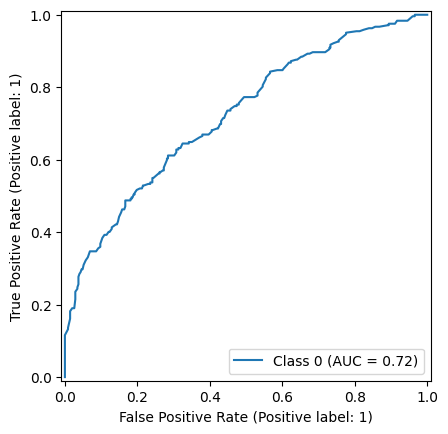

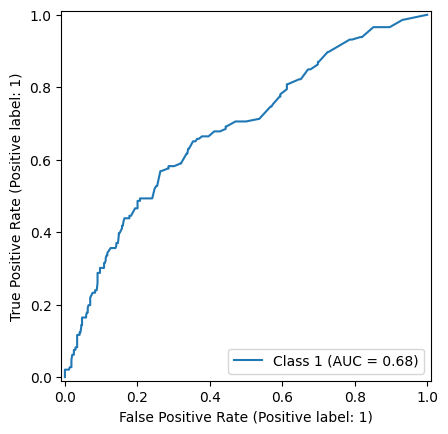

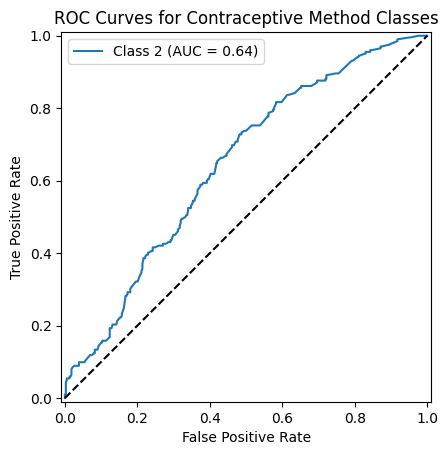

In [56]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from torch_geometric.data import Data
import matplotlib.pyplot as plt

def load_data(filepath):
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Contraceptive_method'])  
    y = data['Contraceptive_method']
    return X, y

def create_graph_data(X, y, K=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_adjusted = y - y.min()  # Adjust to 0-based indexing
    y_tensor = torch.tensor(y_adjusted.values, dtype=torch.long)

    adjacency_matrix = kneighbors_graph(X_scaled, K, mode='connectivity', include_self=False).toarray()
    edge_index = []
    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            if adjacency_matrix[i, j] == 1:
                edge_index.append([i, j])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    x_tensor = torch.tensor(X_scaled, dtype=torch.float)
    graph_data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor)
    input_features = X_scaled.shape[1]
    
    return graph_data, input_features

def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='macro')
    return accuracy, f1, roc_auc

def run_experiments(n_experiments, model_func, X, y):
    accuracy_list, f1_list, roc_auc_list = [], [], []

    for experiment_number in range(n_experiments):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=experiment_number)
        accuracy, f1, roc_auc = model_func(X_train, X_test, y_train, y_test)
        accuracy_list.append(accuracy)
        f1_list.append(f1)
        roc_auc_list.append(roc_auc)
        print(f'Experiment {experiment_number + 1} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}')

    print("\nFinal Results after multiple experiments:")
    print(f'Average Accuracy: {np.mean(accuracy_list):.4f}, Std Dev: {np.std(accuracy_list):.4f}')
    print(f'Average F1 Score: {np.mean(f1_list):.4f}, Std Dev: {np.std(f1_list):.4f}')
    print(f'Average ROC AUC: {np.mean(roc_auc_list):.4f}, Std Dev: {np.std(roc_auc_list):.4f}')
    return np.mean(roc_auc_list)

def decision_tree_experiment_multiple(X, y, n_experiments=10):
    def model_func(X_train, X_test, y_train, y_test):
        dt_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
        return train_and_evaluate_model(X_train, X_test, y_train, y_test, dt_clf)
    
    return run_experiments(n_experiments, model_func, X, y)

def random_forest_experiment_multiple(X, y, n_experiments=10):
    def model_func(X_train, X_test, y_train, y_test):
        rf_clf = RandomForestClassifier()
        return train_and_evaluate_model(X_train, X_test, y_train, y_test, rf_clf)
    
    return run_experiments(n_experiments, model_func, X, y)

def plot_roc_curves(X, y):
    """Plot ROC curves for each class with the best performing model."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    model = RandomForestClassifier()  # Use best-performing model as per your result
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)

    plt.figure(figsize=(10, 8))
    for i, class_label in enumerate(model.classes_):
        RocCurveDisplay.from_predictions((y_test == class_label).astype(int), y_pred_proba[:, i], name=f"Class {class_label}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curves for Contraceptive Method Classes")
    plt.legend()
    plt.show()

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/contraceptive_method_choice.csv')

    # Decision Tree Experiments
    print("Running Decision Tree Experiments")
    decision_tree_roc_auc = decision_tree_experiment_multiple(X, y, n_experiments=10)

    # Random Forest Experiments
    print("\nRunning Random Forest Experiments")
    random_forest_roc_auc = random_forest_experiment_multiple(X, y, n_experiments=10)

    print(f"\nDecision Tree Average ROC AUC: {decision_tree_roc_auc:.4f}")
    print(f"Random Forest Average ROC AUC: {random_forest_roc_auc:.4f}")

    # Plot ROC Curves for Random Forest (as an example)
    plot_roc_curves(X, y)
